Query: c1ccc2cc3c(ccc4cccnc43)cc2c1



,Molecule ID,SMILES,Distance,GED,Hamming
0,9186,O=C(CF)Sc1ccccc1,0.913306,28.0,35
1,9185,O=[N+]([O-])c1ccc(Nc2cccc(C(F)(F)F)c2)cc1,0.911452,19.0,47
2,9176,CC(C)S[C@H]1O[C@H](CO)[C@H](O)[C@H](O)[C@H]1O,0.886004,25.0,48
3,123037,O=c1ccc(Nc2c3ccccc3nc3ccccc23)ccc1O,0.884637,30.0,40
4,9164,Cc1c(C)c2c(c(C)c1O)CCC(C)(CCCCC(C)CCCC(C)CCCC(...,0.882073,43.0,62
5,9168,CN(C)c1ccc(-c2ccc(N(C)C)cc2)cc1,0.880770,15.0,32
6,9188,O=C(NN=C1CCCCC1)C(=O)NN=C1CCCCC1,0.880425,19.0,42
7,9187,O=C(Nc1ccccc1)OCC(F)(F)F,0.880004,24.0,42
8,9179,Nc1nc(Nc2ccccc2)nc(C(F)(F)F)n1,0.879970,25.0,40
9,9178,Fc1nc(F)nc(C(F)(F)F)n1,0.873959,40.0,33


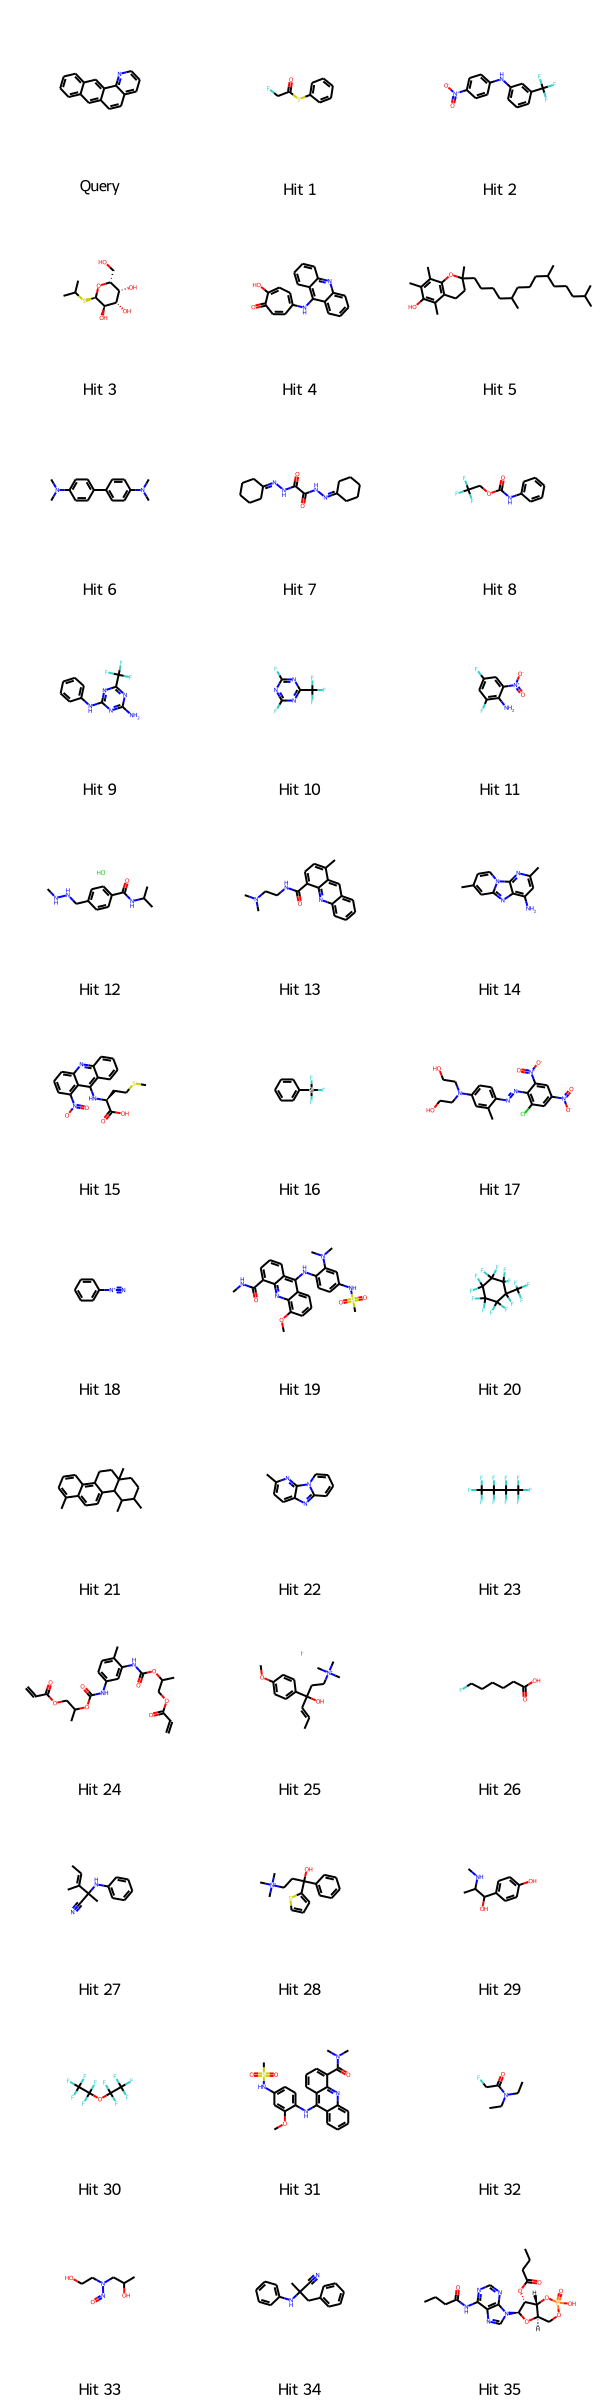

In [305]:
from rdkit import Chem
from rdkit.Chem import Draw
import requests
import pandas as pd

# 1. Configure your query
API_URL = "http://localhost:8000"
query_smiles = "c1ccc2cc3c(ccc4cccnc43)cc2c1"  # <-- replace this with any SMILES you want
top_k = 35

# 2. Fetch results from the API
def semantic_search(texts, top_k=5):
    payload = {"texts": texts, "top_k": top_k}
    resp = requests.post(f"{API_URL}/semantic_search", json=payload)
    resp.raise_for_status()
    return resp.json()

results = semantic_search([query_smiles], top_k)

# 3. Extract original query and hits
original_query = results["queries"][0]
ids = results["ids"][0]
smiles_hits = results["smiles"][0]
distances = results["distances"][0]
geds = results.get("ged", [[None] * len(ids)])[0]
hamms = results.get("hamming", [[None] * len(ids)])[0]  # ← fixed line

# 4. Display a table of results
print(f"Query: {original_query}\n")

df = pd.DataFrame({
    "Molecule ID": ids,
    "SMILES": smiles_hits,
    "Distance": distances,
    "GED": geds,  # ← add this
    "Hamming": hamms
})

display(df)

# 5. Draw the query and hit molecules
mols = [Chem.MolFromSmiles(original_query)] + [Chem.MolFromSmiles(s) for s in smiles_hits]
titles = ["Query"] + [f"Hit {i+1}" for i in range(len(smiles_hits))]
img = Draw.MolsToGridImage(mols, legends=titles, molsPerRow=3, subImgSize=(200, 200))
display(img)



In [308]:
def selfies_semantic_search(texts, top_k=5):
    payload = {"texts": texts, "top_k": top_k}
    resp = requests.post(f"{API_URL}/selfies_semantic_search", json=payload)
    resp.raise_for_status()
    return resp.json()


Query (SELFIES): [C][=C][C][=C][C][=C][C][Branch1][=N][C][=C][C][=C][C][=C][N][=C][Ring1][=Branch1][Ring1][#Branch2][=C][C][Ring1][=C][=C][Ring2][Ring1][C]



,Molecule ID,SELFIES,Distance,GED,Hamming
0,42744,[C][C][=C][C][=N][C][=C][Branch1][=N][C][=C][C...,0.996836,19.0,30
1,77617,[O][C][=C][C][=C][C][=C][Branch1][=N][C][=C][C...,0.995911,20.0,24
2,154755,[C][C][=C][C][=N][C][=C][Branch1][=N][C][=C][C...,0.995852,21.0,35
3,76862,[C][C][=C][C][=C][C][=C][C][Branch1][=N][C][=C...,0.995790,20.0,38
4,18760,[C][C][=C][C][=C][C][=C][C][Branch1][=N][C][=C...,0.995641,20.0,38
5,67494,[C][=C][C][=C][C][=C][N][=C][C][=C][C][=C][C][...,0.995388,17.0,18
6,154823,[C][C][=C][C][=C][C][=C][C][Branch1][=N][C][=C...,0.995325,28.0,47
7,186997,[O][C][=C][C][=C][C][=C][Branch1][=N][C][=C][C...,0.995325,15.0,33
8,184993,[F][C][=C][C][=C][C][=C][C][=C][Branch1][=N][C...,0.995246,10.0,30
9,186219,[C][=C][C][=C][Branch2][Ring1][P][C][=C][C][=C...,0.995145,58.0,30


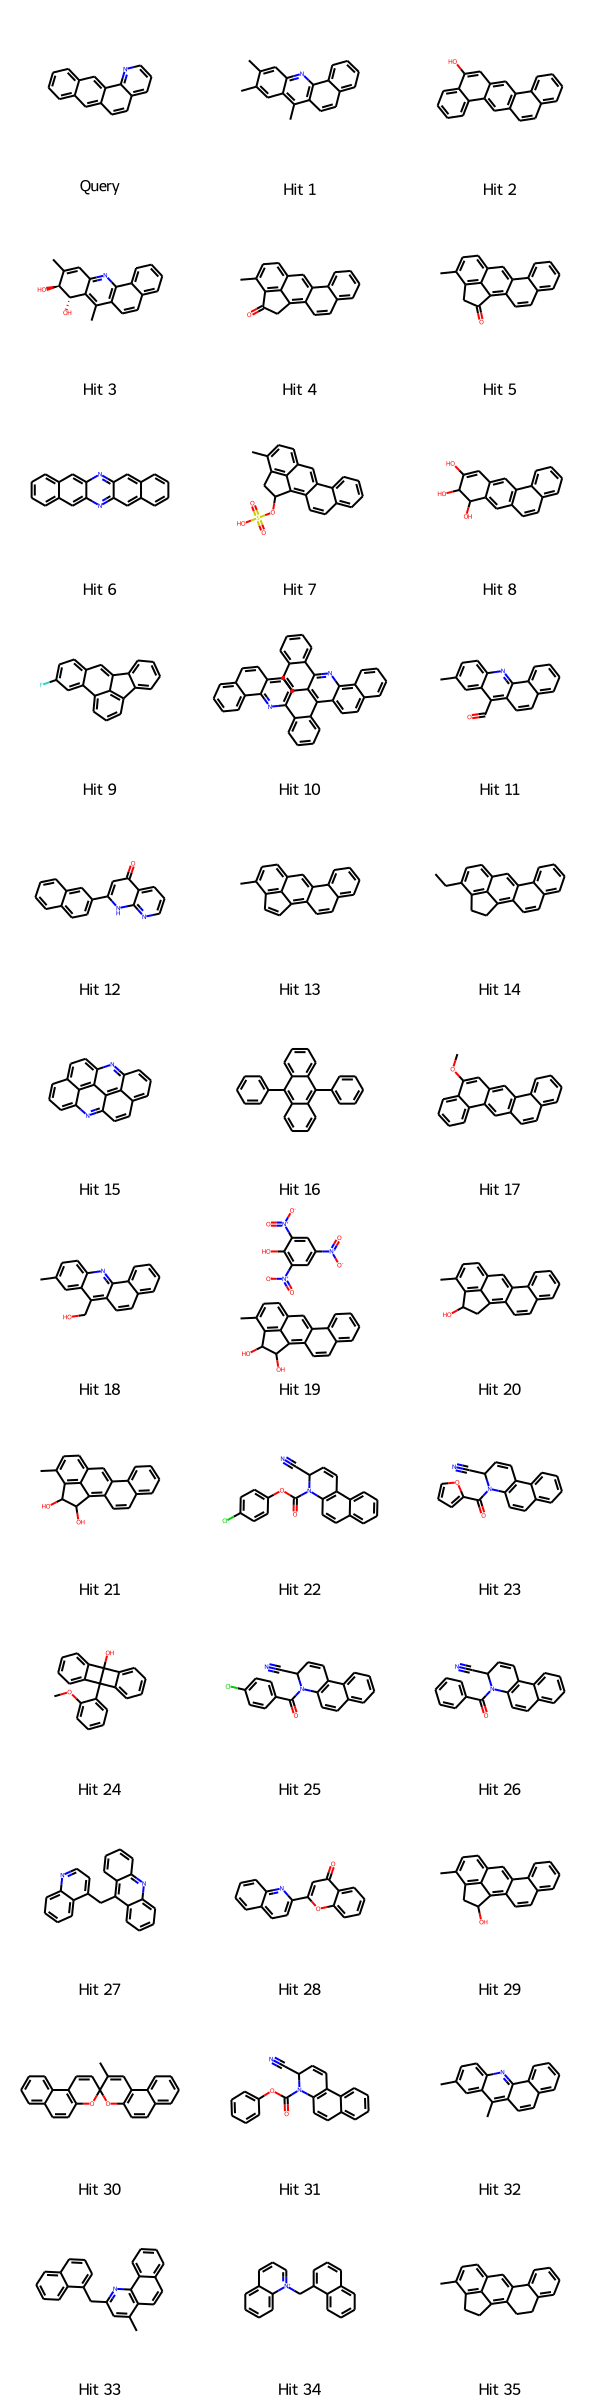

In [309]:
import selfies as sf

query_selfies = sf.encoder(query_smiles)  # convert SMILES to SELFIES

results = selfies_semantic_search([query_selfies], top_k)

original_query = results["queries"][0]
ids = results["ids"][0]
selfies_hits = results.get("selfies", [[]])[0]
distances = results["distances"][0]
geds = results.get("ged", [[None] * len(ids)])[0]
hamms = results.get("hamming", [[None] * len(ids)])[0]  # ← fixed line

print(f"Query (SELFIES): {original_query}\n")
df = pd.DataFrame({
    "Molecule ID": ids,
    "SELFIES": selfies_hits,
    "Distance": distances,
    "GED": geds,  
    "Hamming": hamms
})
display(df)

# Decode SELFIES hits to SMILES for visualization
smiles_hits = [sf.decoder(s) for s in selfies_hits]
mols = [Chem.MolFromSmiles(query_smiles)] + [Chem.MolFromSmiles(s) for s in smiles_hits]
titles = ["Query"] + [f"Hit {i+1}" for i in range(len(smiles_hits))]
img = Draw.MolsToGridImage(mols, legends=titles, molsPerRow=3, subImgSize=(200, 200))
display(img)




,Molecule ID,SMILES,Distance,GED,Hamming
0,6774,c1ccc2cc3c(ccc4cccnc43)cc2c1,1.000000,0.0,0
1,9191,c1ccc2c(c1)ccc1cccnc12,0.801784,15.0,9
2,27930,c1cnc2c(c1)cc1ccc3c4ncccc4cc4ccc2c1c43,0.766131,25.0,11
3,27931,c1cnc2c(c1)cc1ccc3cc4cccnc4c4ccc2c1c34,0.766131,25.0,11
4,1318,c1cnc2c(c1)ccc1cccnc12,0.765465,18.0,10
5,9179,c1ccc2cc3c(ccc4ncccc43)cc2c1,0.760609,2.0,12
6,154784,Fc1ccc2ccc3cccnc3c2c1,0.760609,13.0,43
7,9174,c1ccc2c(c1)ccc1c2ccc2cccnc21,0.750000,2.0,12
8,146725,[Ru].c1cnc2c(c1)ccc1cccnc12.c1cnc2c(c1)ccc1ccc...,0.742611,76.0,32
9,167568,[Co+2].c1cnc2c(c1)ccc1cccnc12.c1cnc2c(c1)ccc1c...,0.742611,76.0,30


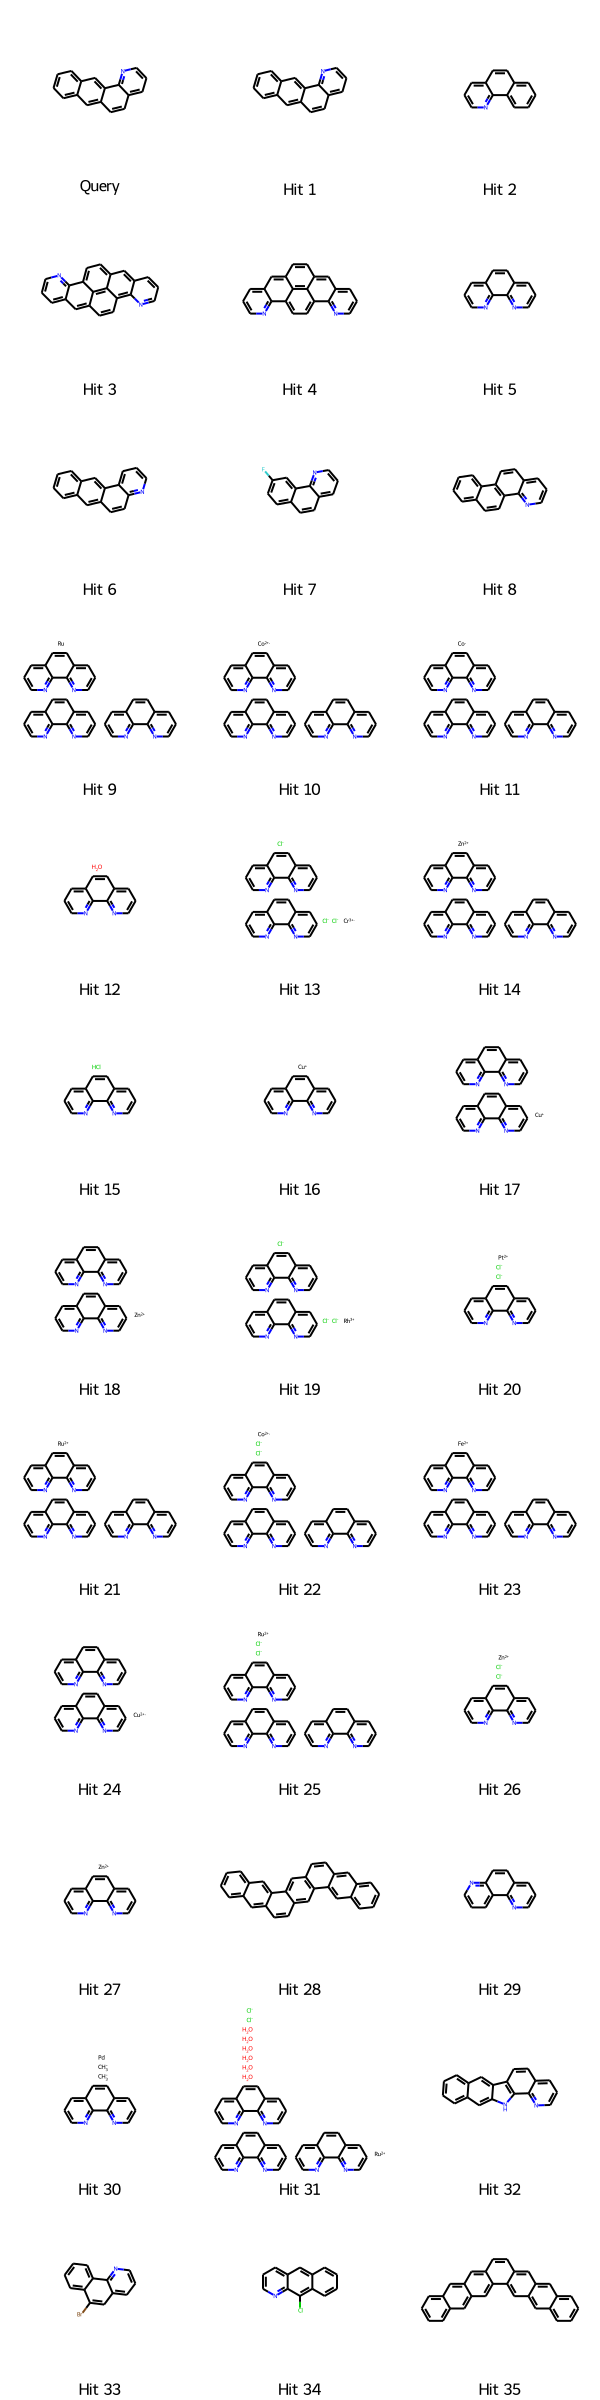

In [311]:
# Helper to call fingerprint semantic search
def fingerprint_semantic_search(texts, top_k=5):
    payload = {"texts": texts, "top_k": top_k}
    resp = requests.post(f"{API_URL}/fingerprint_semantic_search", json=payload)
    resp.raise_for_status()
    return resp.json()

# 1. Run the search
#query_smiles = "C=CC(=O)OCCC"
results_fp = fingerprint_semantic_search([query_smiles], top_k)

# 2. Extract and tabulate
ids        = results_fp["ids"][0]
smiles_hits = results_fp["smiles"][0]
distances  = results_fp["distances"][0]
geds       = results_fp.get("ged", [[None]*len(ids)])[0]
hamms      = results_fp.get("hamming", [[None]*len(ids)])[0]

df_fp = pd.DataFrame({
    "Molecule ID": ids,
    "SMILES":      smiles_hits,
    "Distance":     distances,
    "GED":          geds,
    "Hamming":      hamms
})
display(df_fp)
# 3. Visualize molecules
mols = [Chem.MolFromSmiles(query_smiles)] + [Chem.MolFromSmiles(s) for s in smiles_hits]
titles = ["Query"] + [f"Hit {i+1}" for i in range(len(smiles_hits))]
img = Draw.MolsToGridImage(mols, legends=titles, molsPerRow=3, subImgSize=(200, 200))
display(img)

In [278]:
###TANIMOTO###

,Molecule ID,SMILES,Distance,GED,Hamming
0,6774,c1ccc2cc3c(ccc4cccnc43)cc2c1,1.000000,0.0,0
1,9191,c1ccc2c(c1)ccc1cccnc12,0.678571,15.0,9
2,27930,c1cnc2c(c1)cc1ccc3c4ncccc4cc4ccc2c1c43,0.633333,25.0,11
3,27931,c1cnc2c(c1)cc1ccc3cc4cccnc4c4ccc2c1c34,0.633333,25.0,11
4,9179,c1ccc2cc3c(ccc4ncccc43)cc2c1,0.625000,2.0,12
5,154776,COc1nncc2ccncc12,0.625000,25.0,12
6,1318,c1cnc2c(c1)ccc1cccnc12,0.615385,18.0,10
7,9174,c1ccc2c(c1)ccc1c2ccc2cccnc21,0.612903,2.0,12
8,21226,O.c1cnc2c(c1)ccc1cccnc12,0.592593,22.0,11
9,65246,O=C(COP(=O)(O)O)[C@@H](O)[C@H](O)[C@H](O)CO,0.592593,30.0,11


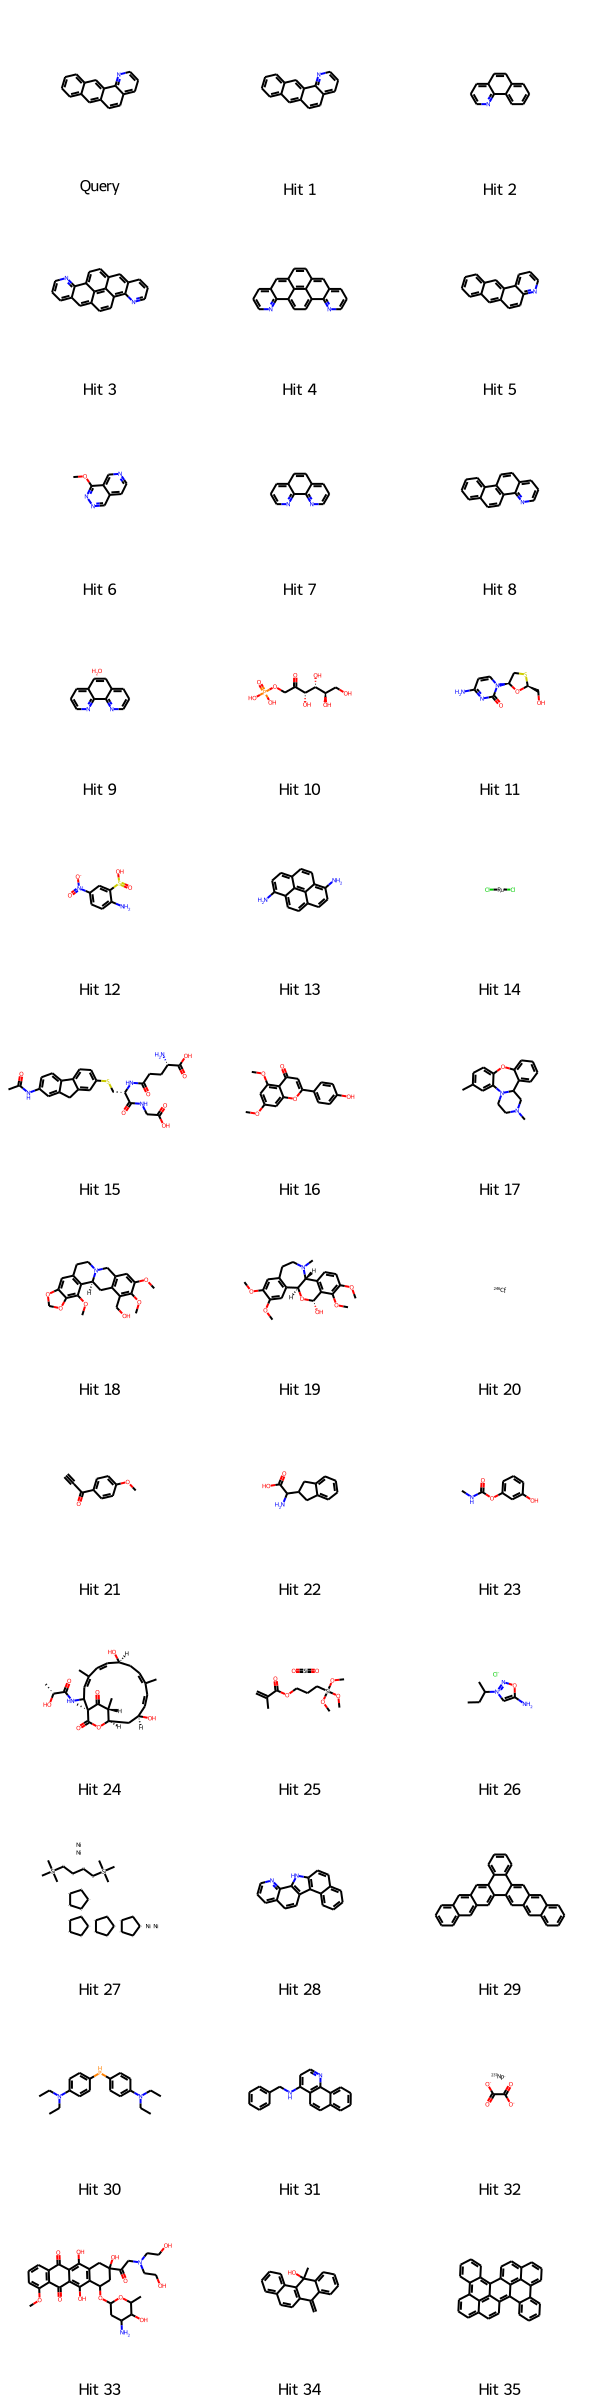

In [310]:
top_k = 35
# Helper to call fingerprint semantic search
def fingerprint_semantic_search(texts, top_k=5):
    payload = {"texts": texts, "top_k": top_k}
    resp = requests.post(f"{API_URL}/fingerprint_semantic_search_Tanimoto", json=payload)
    resp.raise_for_status()
    return resp.json()

# 1. Run the search
#query_smiles = "C=CC(=O)OCCC"
results_fp = fingerprint_semantic_search([query_smiles], top_k)

# 2. Extract and tabulate
ids        = results_fp["ids"][0]
smiles_hits = results_fp["smiles"][0]
distances  = results_fp["distances"][0]
geds       = results_fp.get("ged", [[None]*len(ids)])[0]
hamms      = results_fp.get("hamming", [[None]*len(ids)])[0]

df_fp = pd.DataFrame({
    "Molecule ID": ids,
    "SMILES":      smiles_hits,
    "Distance":     distances,
    "GED":          geds,
    "Hamming":      hamms
})
display(df_fp)

# 3. Visualize molecules
mols = [Chem.MolFromSmiles(query_smiles)] + [Chem.MolFromSmiles(s) for s in smiles_hits]
titles = ["Query"] + [f"Hit {i+1}" for i in range(len(smiles_hits))]
img = Draw.MolsToGridImage(mols, legends=titles, molsPerRow=3, subImgSize=(200, 200))
display(img)

In [280]:
#END#############################################################################################

SELFIES Fingerprint Semantic Search — Query (SELFIES): [C][=C][C][=C][C][=C][C][Branch1][=N][C][=C][C][=C][C][=C][N][=C][Ring1][=Branch1][Ring1][#Branch2][=C][C][Ring1][=C][=C][Ring2][Ring1][C]



,Molecule ID,SELFIES,Distance
0,6774,[C][=C][C][=C][C][=C][C][Branch1][=N][C][=C][C...,1.000000
1,9191,[C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][...,0.801784
2,27931,[C][=C][N][=C][C][=Branch1][Ring2][=C][Ring1][...,0.766131
3,27930,[C][=C][N][=C][C][=Branch1][Ring2][=C][Ring1][...,0.766131
4,1318,[C][=C][N][=C][C][=Branch1][Ring2][=C][Ring1][...,0.765465
5,154784,[F][C][=C][C][=C][C][=C][C][=C][C][=C][N][=C][...,0.760609
6,9179,[C][=C][C][=C][C][=C][C][Branch1][=N][C][=C][C...,0.760609
7,9174,[C][=C][C][=C][C][=Branch1][Ring2][=C][Ring1][...,0.750000
8,21226,[O].[C][=C][N][=C][C][=Branch1][Ring2][=C][Rin...,0.742611
9,73350,[Cl].[C][=C][N][=C][C][=Branch1][Ring2][=C][Ri...,0.742611


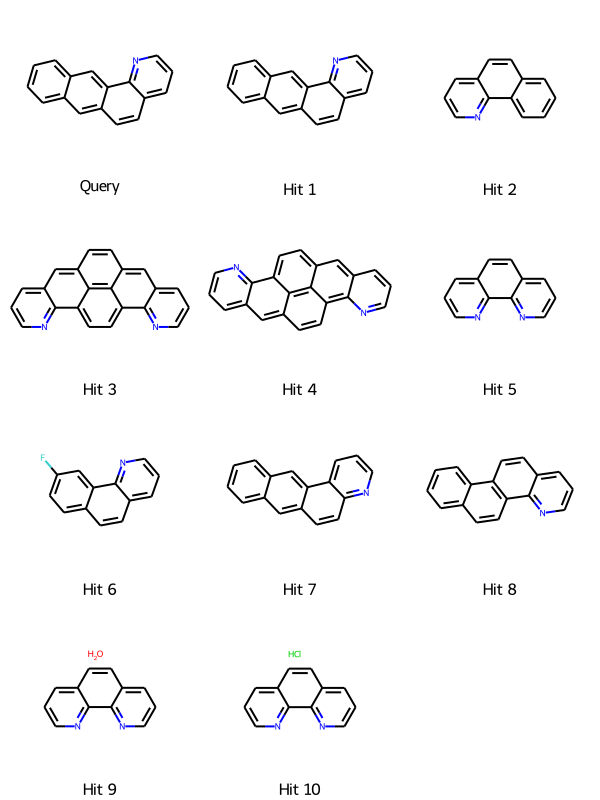

In [281]:
# Helper to call SELFIES fingerprint semantic search
def selfies_fingerprint_semantic_search(texts, top_k=5):
    payload = {"texts": texts, "top_k": top_k}
    resp = requests.post(f"{API_URL}/selfies_fingerprint_semantic_search", json=payload)
    resp.raise_for_status()
    return resp.json()

# 1. Encode query to SELFIES and run
#query_smiles = "C=CC(=O)OCCC"
#query_selfies = sf.encoder(query_smiles)
results_sfp = selfies_fingerprint_semantic_search([query_selfies], top_k)

# 2. Extract and tabulate
ids_sf = results_sfp["ids"][0]
selfies_hits = results_sfp["selfies"][0]
distances_sf = results_sfp["distances"][0]
df_sfp = pd.DataFrame({
    "Molecule ID": ids_sf,
    "SELFIES": selfies_hits,
    "Distance": distances_sf
})
print(f"SELFIES Fingerprint Semantic Search — Query (SELFIES): {query_selfies}\n")
display(df_sfp)

# 3. Decode SELFIES → SMILES for visualization
smiles_hits_sf = [sf.decoder(s) for s in selfies_hits]
mols_sf = [Chem.MolFromSmiles(query_smiles)] + [Chem.MolFromSmiles(s) for s in smiles_hits_sf]
titles_sf = ["Query"] + [f"Hit {i+1}" for i in range(len(smiles_hits_sf))]
img_sf = Draw.MolsToGridImage(mols_sf, legends=titles_sf, molsPerRow=3, subImgSize=(200, 200))
display(img_sf)

In [282]:
query_texts = ["CCO"]  # Simple SMILES string for ethanol
results = semantic_search(query_texts, top_k=5)
pretty_print_results(results)


NameError: name 'pretty_print_results' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [ ]:
# 1. Define some example SMILES
smiles = ["CCO", "CCN", "CCC", "CCCl", "CC(C)O"]

# 2. Call the /embed endpoint
resp = requests.post(f"{API_URL}/embed", json={"texts": smiles})
resp.raise_for_status()
embeds = np.array(resp.json()["embeddings"])

# 3. Show shape and first couple of vectors
print("Embeddings shape:", embeds.shape)
pd.DataFrame(embeds[:3], columns=[f"H{i}" for i in range(embeds.shape[1])]).head()


In [ ]:
# Run PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(embeds)

# Plot
plt.figure(figsize=(6,6))
for i, smi in enumerate(smiles):
    x, y = proj[i]
    plt.scatter(x, y)
    plt.text(x + .02, y + .02, smi, fontsize=12)
plt.title("PCA of ChemBERTa Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Define some example SMILES
smiles = ["CCO", "CCN", "CCC", "CCCl", "CC(C)O"]

# Convert to RDKit Mol objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles]

# Draw molecules in a grid
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=smiles)


In [ ]:
# 1. Pick one of the embeddings (e.g. index 0)
vector = embeds[0].tolist()

# 2. Query /search for top 5 neighbors
payload = {"vectors": [vector], "top_k": 5}
resp = requests.post(f"{API_URL}/search", json=payload)
resp.raise_for_status()
out = resp.json()

# 3. Display results
# Option 1: simple display with index
#df



In [ ]:
# Example molecule SMILES queries
query_texts = [
    "CCO",              # Ethanol
    "CC(C)OC(=O)C",     # Isopropyl acetate (a solvent)
    "CC(=O)OC1=CC=CC=C1C(=O)O",  # Aspirin
]

results = semantic_search(query_texts, top_k=5)


In [ ]:
from IPython.display import display, HTML

# Display results in sections
for i, q in enumerate(query_texts):
    ids = results['ids'][i]
    distances = results['distances'][i]
    df = pd.DataFrame({"Molecule ID": ids, "Distance": distances})
    display(HTML(f"<h4>Query: <code>{q}</code></h4>"))
    display(HTML(df.to_html(index=False)))


In [ ]:


# Load the data
df = pd.read_csv("sample_embeddings.csv")

# Extract IDs and embeddings
ids = df["id"].tolist()
embedding_cols = [col for col in df.columns if col.startswith("embedding_")]
embeddings = df[embedding_cols].values


In [ ]:
# Run PCA on preloaded embeddings
pca = PCA(n_components=2)
reduced = pca.fit_transform(np.array(embeddings))

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.5)
for i, txt in enumerate(ids):
    plt.annotate(txt, (reduced[i, 0], reduced[i, 1]), fontsize=6)
plt.title("Molecule Embeddings Clustered by PCA")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.tight_layout()
plt.show()